<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/area_comprimento_integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cálculo Numérico**

José Claudinei Ferreira

Universidade Federal de Alfenas.

#**Integração numérica**

#**Exemplo 1.**

Considere a curva $(s,s^2+1)$, para $s\in [-1,1]$, ou o gráfico da função $f(s)=s^2+1$, nesse intervalo.

In [ ]:
def f(s):
  p=s**2+1
  return p

Vejamos a curva gráficamente.

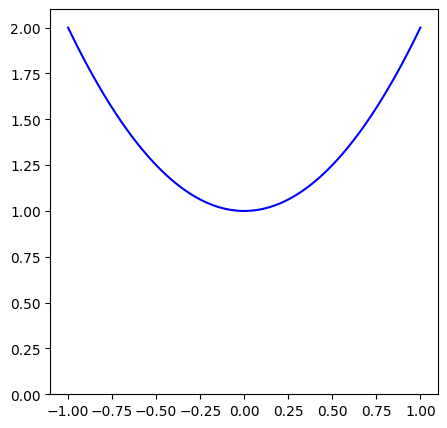

In [ ]:
import numpy as np, matplotlib.pyplot as plt

x=np.linspace(-1,1,100)
y=[f(s) for s in x]

fig = plt.figure(figsize=(5,5))
plt.plot(x,y,color='blue')
plt.ylim((0, 2.1))
plt.show()

a) Determine uma aproximação para o comprimento dessa curva.

b) Calcule a área da região entre a curva e o eixo $x$.

**a)**

Podemos escolher alguns pontos $x_i$, entre $-1$ e $1$ e calcular as coordendas $(x_i,f(x_i))$ dos pontos obtidos sobre a curva.

Por exemplo, pode tomar $x_0=-1$ e $x_j=x_{j-1}+h$, em que $h=2/n$. Escolhendo $n$:

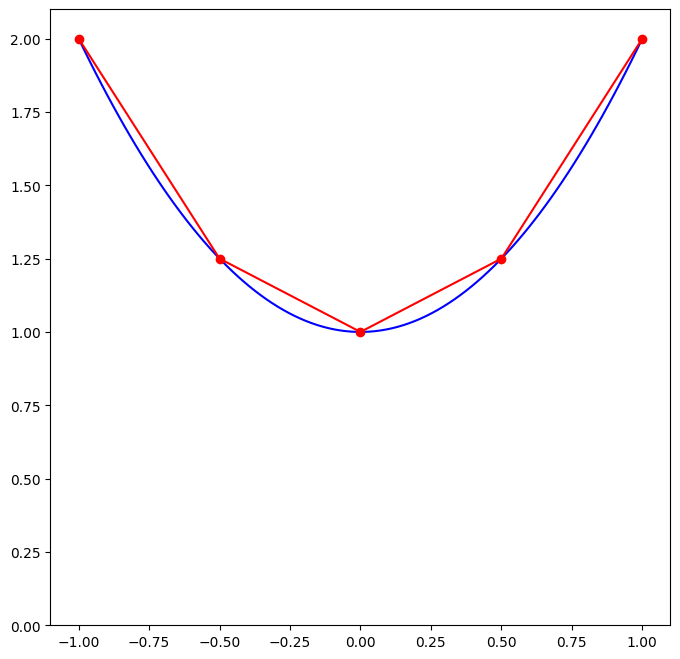

5

In [ ]:
n=5
xx=np.linspace(-1,1,n)
yy=[f(s) for s in xx]

fig = plt.figure(figsize=(8,8))
plt.plot(x,y,color='blue')
plt.plot(xx,yy,'o',color='red')
plt.plot(xx,yy,color='red')
plt.ylim((0, 2.1))
plt.show()
len(xx)

Somando agora os comprimentos do segmento de reta que ligam os pontos $(x_j,f(x_j))$ e $(x_{j-1},f(x_{j-1}))$ temos uma aproximação para o comprimento da curva como
$$\sqrt{(x_1-x_0)^2+(f(x_1)-f(x_0))^2}+\sqrt{(x_2-x_1)^2+(f(x_2)-f(x_2))^2}+\cdots+\sqrt{(x_{10}-x_9)^2+(f(x_{10})-f(x_0))^2},$$ usando o teorema de Pitágoras, em cada segmento de reta.

In [ ]:
h=2/n
p=0
for i in range(1,len(xx)):
  p=p+np.sqrt(h**2+(f(xx[i])-f(xx[i-1]))**2)

p

2.6433981132056603

Como $x_i-x_{i-1}=h$, podemos reescrever a soma anterior como
$$\sum_{i=1}^n\sqrt{1+\left(\frac{f(x_i)-f(x_{i-1})}{h}\right)^2}h\approx\sum_{i=1}^n\sqrt{1+\left(f'(x_i)\right)^2}h\approx \int_{-1}^1\sqrt{1+\left(f'(s)\right)^2}ds=\int_{-1}^1\sqrt{1+(2s)^2}ds\approx 2.95789,$$ (ver [link](https://www.wolframalpha.com/input?i=%5Cint_%7B-1%7D%5E1%5Csqrt%7B1%2B%282s%29%5E2%7Dds)) quando $n$ for grande o suficiente,
uma vez que $$\frac{f(x_i)-f(x_{i-1})}{h}\approx f'(x_i).$$

Podemos ainda observar que o comprimento estimado acima é menor do que o comprimento da curva. Obtemos uma curva poligonal com comprimento maior, quando acrescentamos pontos da forma $(s_i,f(s_i))$ na nossa lista, com $s_i=x_i+h/2$, por exemplo.



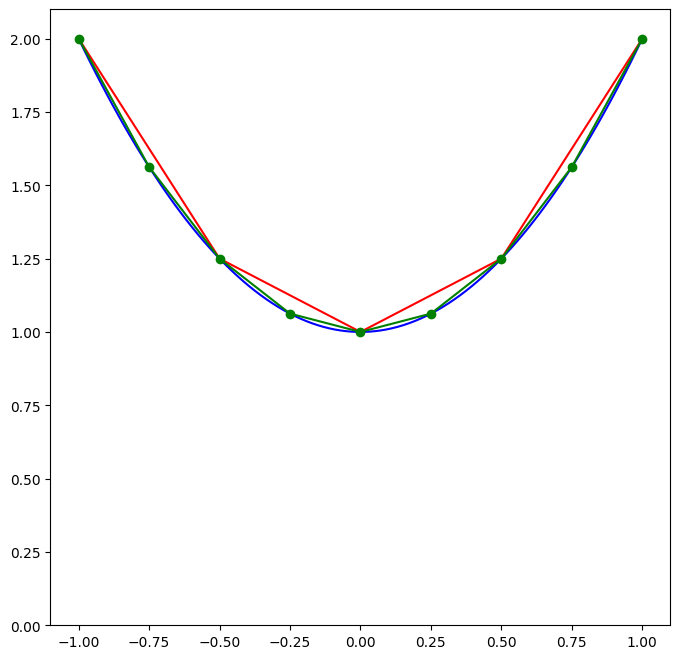

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(x,y,color='blue')
plt.plot(xx,yy,color='red')

n=5
xx=np.linspace(-1,1,2*n-1)
yy=[f(s) for s in xx]

plt.plot(xx,yy,'o',color='green')
plt.plot(xx,yy,color='green')
plt.ylim((0, 2.1))
plt.show()

<font color=blue> Vamos tentar obter um comprimento maior do que o da curva, para garantir que a aproximação pode ser suficientemente boa, quando $n$ for suficientemente grande.

Para isso vamos acrescentar, por exemplo, pontos $(s_i,t_i)$, na curva poligonal, como $s_i=x_i+h/2$ e $$t_i=\begin{cases}f(x_{i+1})&, \text{ se } x_i\leq 0\\\\f(x_{i})&, \text{ se } x_i> 0\end{cases}$$

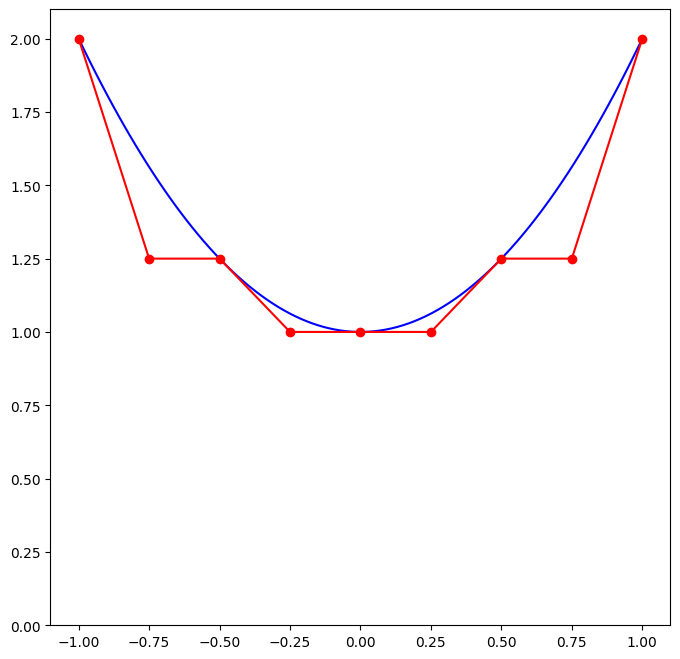

In [ ]:
n=5
xx=np.linspace(-1,1,2*n-1)
yy=[f(s) for s in xx]

for i in range(0,n-1):
  if xx[2*i]>=0:
    yy[2*i+1]=f(xx[2*i])
  else:
    yy[2*i+1]=f(xx[2*i+2])

fig = plt.figure(figsize=(8,8))
plt.plot(x,y,color='blue')
plt.plot(xx,yy,'o',color='red')
plt.plot(xx,yy,color='red')
plt.ylim((0, 2.1))
plt.show()

Podemos ver que as somas  das medidas dos segmentos da curva poligonal serão sempre maiores que o comprimento da curva.

In [ ]:
h=2/n

p=0
for i in range(1,len(xx)):
  p=p+np.sqrt(h**2+(f(xx[i])-f(xx[i-1]))**2)

p

3.8940241847389823

**b)**

Podemos ainda estimar a área da região em questão, usando trapézios, com os pontos sobre a curva, por exemplo.

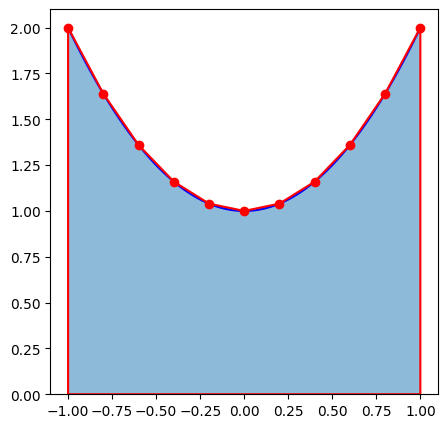

11

In [ ]:
n=11
xx=np.linspace(-1,1,n)
yy=[f(s) for s in xx]

xxs=[-1]
yys=[0]
for i in range(0,len(xx)):
  xxs.append(xx[i])
  yys.append(yy[i])
xxs.append(xx[-1])
yys.append(0)
xxs.append(-1)
yys.append(0)

fig = plt.figure(figsize=(5,5))
plt.plot(x,y,color='blue')
plt.plot(xx,yy,'o',color='red')

y0=[0 for t in yy]
plt.plot(xxs,yys,color='red')
plt.fill_between(xx, yy, y0, alpha=.5, linewidth=0)
plt.ylim((0, 2.1))
plt.show()
len(xx)

A soma das áreas dos trapézios será $$\left.\sum_{i=1}^n\left(\frac{f(x_i)+f(x_{i-1})}{2}\right)h\approx \int_{-1}^1f(s)ds=\left(\frac{1}{3}x^3+x\right)\right|_{-1}^1=\frac{1}{3}+1-\left(-\frac{1}{3}-1\right)=\frac{2}{3}+2.$$

Vejamos uma aproximação.

In [ ]:
h=2/n
p=0
for i in range(1,len(xx)):
  p=p+(f(xx[i])+f(xx[i-1]))*h/2

p

2.4363636363636365

#**Regra dos trapézios:** polinômio interpolador de grau 1

A soma das áreas dos trapézios de bases $f(x_i)$ e $f(x_{i-1})$ e altura $h$ é dada por $$\sum_{i=1}^n\left(\frac{f(x_i)+f(x_{i-1})}{2}\right)h\approx \int_{a}^bf(s)ds,$$ quando $f:[a,b]\to \mathbb{R}$ é contínua e $a=x_0$, $x_i=x_{i-1}+h$, $b=x_n$ e $h=(b-a)/n$.

**Obs:** O erro cometido na aproximação tem a ver com o [erro cometido na interpolação polinomial](https://github.com/j-claudinei-f/j-claudinei-f/blob/main/Interpola%C3%A7%C3%A3o_polinomial.ipynb).

#**Exemplo 2:**

Considere $$f(s)=\frac{1}{1+s^2},$$ e calcule $$\int_{-5}^5f(s)ds.$$

Podemos encontrar o polinômio $p(s)$, que interpole $f(x_i)=y_i$, em que $$x_i=\frac{b-a}{2}\cos\left(\frac{\pi(2i-1)}{2n}\right),\qquad a=-5,\qquad b=5,$$ são inspirados nos [nós de Tchebychev](https://pt.wikipedia.org/wiki/Polin%C3%B4mios_de_Tchebychev), para $i=0,\,1,\,\ldots,\,n=25$.

In [ ]:
n=25
a=-5
b=5

x=[]

for k in range(1,n+1): # Nós de Chebyshev reescalados.
  x.append((b-a)*np.cos(np.pi*(2*k-1)/(2*n))/2)

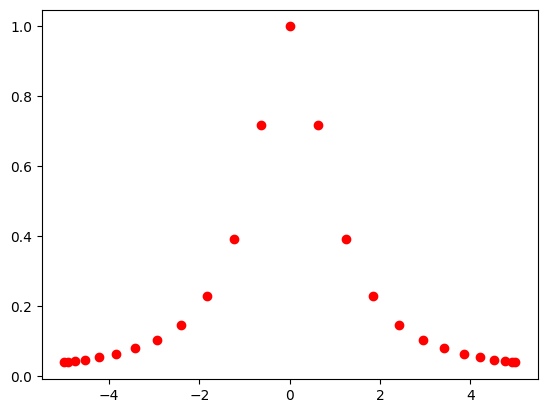

In [ ]:
def f(s):
  return 1/(1+s**2)

y=[f(s) for s in x]

n=len(x)

plt.plot(x,y,'o',color="red")
plt.show()

Vamos calcular os coeficientes do polinômio.

In [ ]:
import numpy as np

x=np.array(x)
y=np.array(y)

A=[]

for i in range(0,len(x)):
  A.append(x**i)

A=np.array(A)
A=np.transpose(A)

u=np.linalg.solve(A,y)

Definindo o polinômio $p(s)$:

In [ ]:
def poli(s):
  p=0
  for i in range(0,len(x)):
    p=p+u[i]*s**i
  return p

Vejamos se o polinômio é um bom ajuste para os dados:

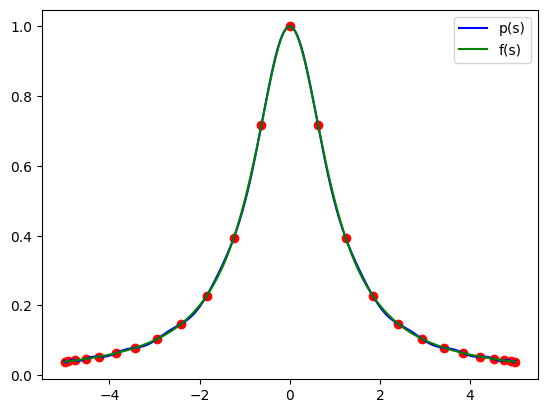

In [ ]:
xx=np.linspace(-5,5,1000)
yy=[poli(s) for s in xx]
fy=[f(s) for s in xx]

plt.plot(x,y,'o', color='red')
plt.plot(xx,yy,color='blue',label='p(s)')
plt.plot(xx,fy,color='green',label='f(s)')
plt.legend()
plt.show()

Calculamos agora
$$\int_{-5}^5f(s)ds\approx \int_{-5}^5p(s)ds=P(5)-P(-5)$$

Em que $$P(s)=\int p(s)ds$$

In [ ]:
def Poli(s):
  p=0
  for i in range(0,len(x)):
    p=p+u[i]*s**(i+1)/(i+1)
  return p

Segue que uma aproximação para a integral é

In [ ]:
Poli(5)-Poli(-5)

2.7470633866250864

#**Regra de Simpson:** polinômio interpolador de grau 2

A soma das áreas das regiões entre as parábolas que passam pelos pontos $(x_i,f(x_i))$, $(x_{i+1},f(x_{i+1}))$ e $(x_{i+2},f(x_{i+2}))$ é dada por $$\sum_{i=0}^{\frac{n-2}{2}}\left(f(x_{2i})+4f(x_{2i+1})+f(x_{2i+2})\right)\frac{h}{3}\approx \int_{a}^bf(s)ds,$$ quando $f:[a,b]\to \mathbb{R}$ é contínua e $a=x_0$, $x_i=x_{i-1}+h$, $b=x_n$ e $h=(b-a)/n$, com $n$ número natural par.

**Obs:** O erro cometido na aproximação tem a ver com o [erro cometido na interpolação polinomial](https://github.com/j-claudinei-f/j-claudinei-f/blob/main/Interpola%C3%A7%C3%A3o_polinomial.ipynb).

#**Exemplo 3:**

Considere $$f(s)=\frac{1}{1+s^2},$$ e calcule $$\int_{-5}^5f(s)ds.$$

Podemos encontrar o polinômio $p(s)$, que interpole $f(x_i)=y_i$, em que $$x_i=x_{i-1}+h,\qquad h=\frac{10}{n}.$$

In [16]:
import numpy as np, matplotlib.pyplot as plt
n=24
h=10/n

x=np.linspace(-5,5,n)

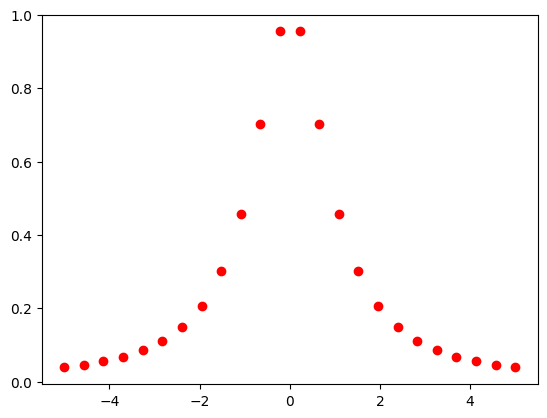

In [17]:
def f(s):
  return 1/(1+s**2)

y=[f(s) for s in x]

n=len(x)

plt.plot(x,y,'o',color="red")
plt.show()

Calculamos agora,

$$\int_{-5}^5f(s)ds,$$ pela regra de Simpson:

In [18]:
p=0
m=round((len(x)-2)/2)
for i in range(0,m):
  p=p+(f(x[2*i])+4*f(x[2*i+1])+f(x[2*i+2]))*h/3

p

2.614859443169676